# Python y Machine Learning: de 0 a 100 con Aprendizaje por Refuerzo

<div hidden><img src="https://i.imgur.com/9YyVSB2.jpg" width="60%"/></div>

En este curso de introducción aprenderemos lo más básico de esta rama del machine learning, la cual en los últimos años ha sido protagonista de grandes hitos, tales como el desarrollo de AlphaGo o AlphaStar. La combinación de este campo con el del Deep Learning ha supuesto toda una revolución. En este curso trataremos las bases del RL.

![Ramas del Machine Learning](https://miro.medium.com/max/1018/1*Yf8rcXiwvqEAinDTWTnCPA.jpeg)

# Parte Teórica

## ¿Qué recursos vamos a utilizar?

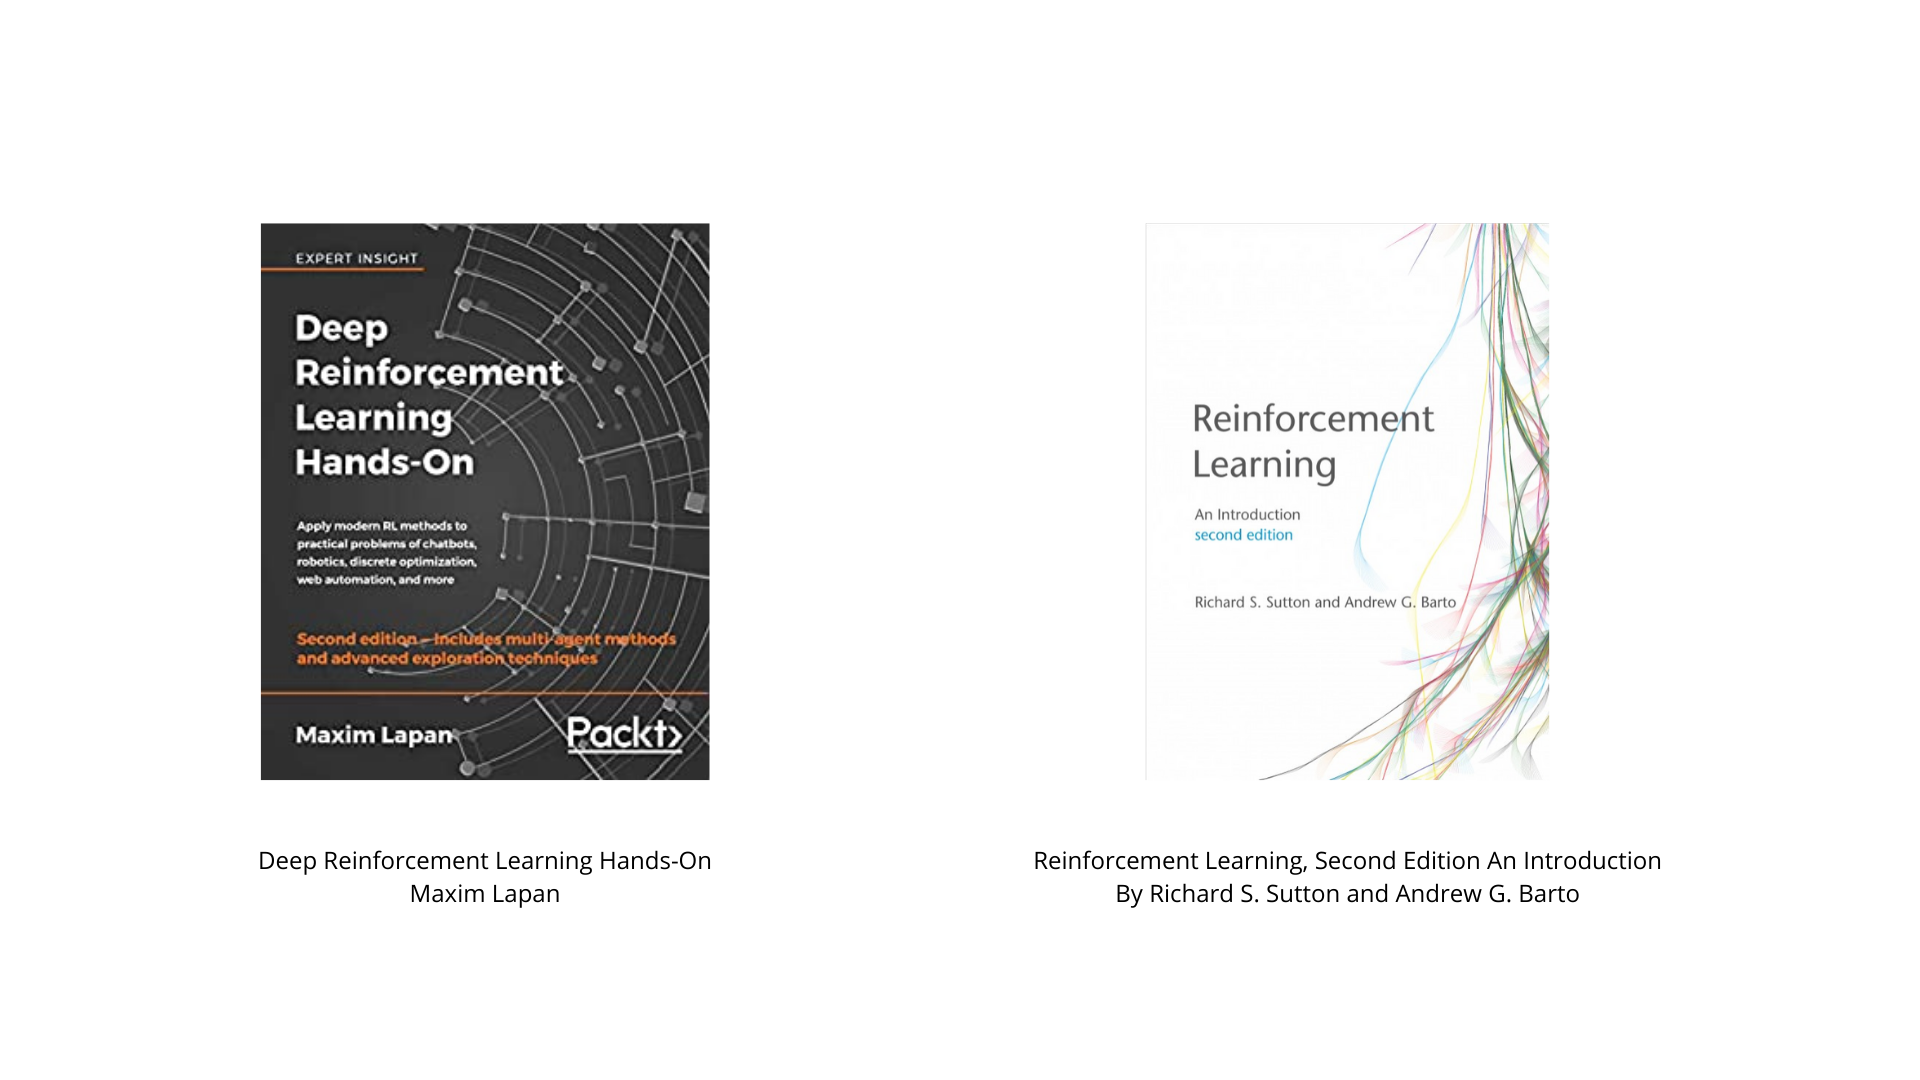

## ¿Qué es el Aprendizaje por Refuerzo o RL?

Es una rama del Machine Learning en la que un **agente**, o conjunto de agentes (MultiAgent Systems), realiza **observaciones** dentro de un **entorno**, para, a continuación, ejecutar una serie de **acciones** dentro de éste y obtener una **recompensa** en función de dichas acciones. En el ejemplo clásico, se pueden entender las distintas piezas del RL de la siguiente manera:

- **Agente**: Ratón
- **Observaciones**: Vista y Olfato
- **Entorno**: Laberinto
- **Acciones**: Alante / Atrás / Izquierda / Derecha
- **Recompensa**: Queso

\
\
![Mouse](https://media.giphy.com/media/1080OHZwvsMhws/source.gif)


\
\
Al **principio** el agente será desconocedor absoluto del entorno y realizará las acciones de forma **aleatoria**. Sin embargo, con el paso del tiempo, dichas acciones le llevarán, por estadística, a alcanzar el objetivo que previamente hemos definido (esta parte se conoce como **exploración** y es muy importante en RL, lo veremos más adelante). Una vez alcanzado el objetivo deseado el agente recibe una recompensa de forma que el conjunto de acciones que le han llevado hasta ese punto (el queso) obtienen una "valoración más positiva" y serán ejecutadas con mayor probabilidad en próximas ocasiones (esta parte se conoce como **explotación** y también es muy importante en RL, como veremos más adelante).

En RL es fundamental el **equilibrio entre la exploración de nuevas posibilidades y la explotación de las posibilidades ya conocidas**.

![explotationvsexploration](https://steemitimages.com/640x0/https://steemitimages.com/DQmXH5tjBiS41iNtcyvh7s7Rj5z3SqGkcwoaV2otRJNx3FT/Exploration_vs._Exploitation.png)

\
Si querés saber un poco más sobre el hito que mencionábamos al inicio de **Alphago** este documental (libre en Youtube recientemente "gracias" al Covid-19) es una magnífica forma de conocerlo.

<br>
<br>

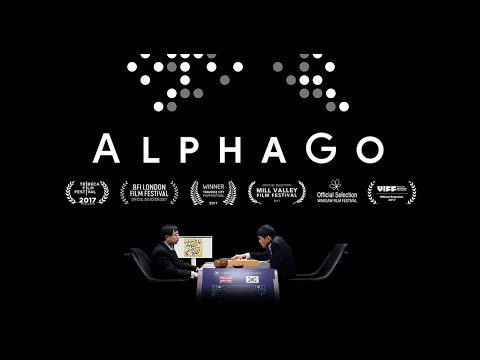

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('WXuK6gekU1Y', width=720, height=480)

## Base teórica sobre el Aprendizaje por Refuerzo: Procesos de Decisión de Markov

Bien, ya conocemos algunos de los conceptos básicos del aprendizaje por refuerzo, como son el agente, las observaciones, el entorno, las acciones y la recompensa, a continuación, para poder ahondar en conceptos más matemáticos es necesario presentar los términos de **estado, episodio, historia y valor**. Y éstos se entienden dentro del concepto de *Markov Decision Processes* que vamos a ver a continuación.



### Cadena de Markov: observando estados y transiciones

Una cadena de Markov es una secuencia de eventos estocásticos (que se dan con cierta probabilidad) que cumple la ***propiedad de Markov***: *cada evento futuro depende únicamente del estado actual en el que nos encontremos* (sin importar lo que ha sucedido previamente). Veamos esto con un ejemplo sobre el tiempo en nuestra ciudad. Durante unos días recogemos datos sobre cómo hace cada día, para hacerlo más sencillo vamos a diferenciar tan sólo entre lluvioso y soleado (este conjunto de dos posibles estados son nuestro ***state space*** o espacio de estados), y con ello generamos una **historia**:


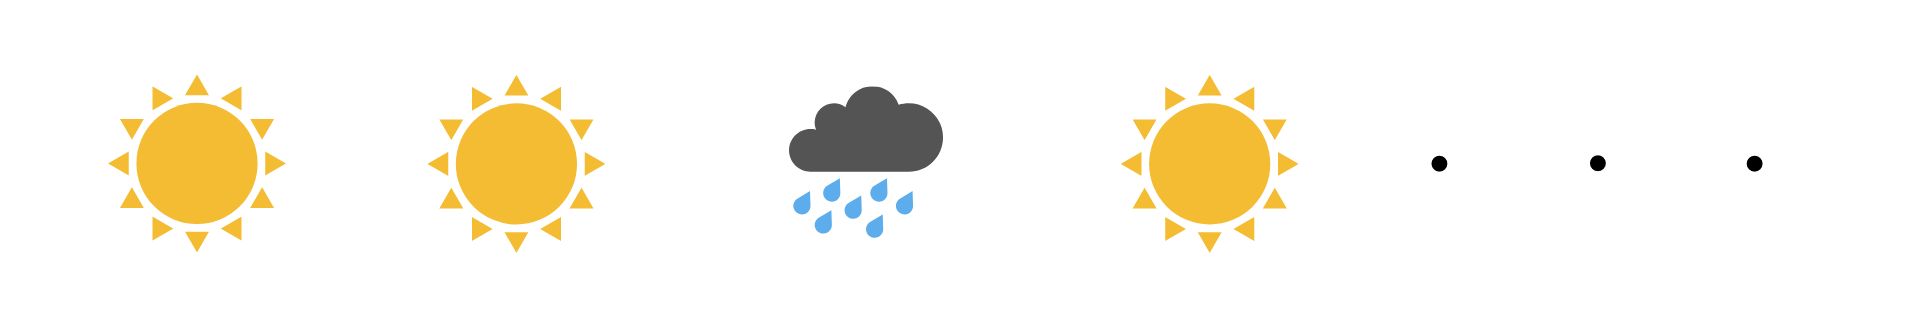

Y a continuación, podemos capturar las probabilidades de transición, es decir, responder a la pregunta de ¿con qué probabilidad será mañana soleado/lluvioso sabiendo que hoy es soleado/lluvioso? Y obtenemos la siguiente **matriz de transición**. En este caso podéis ver que la probabilidad de que a un día soleado le siga otro día soleado es del 80% y que a un día lluvioso le siga otro día lluvioso es del 40%.

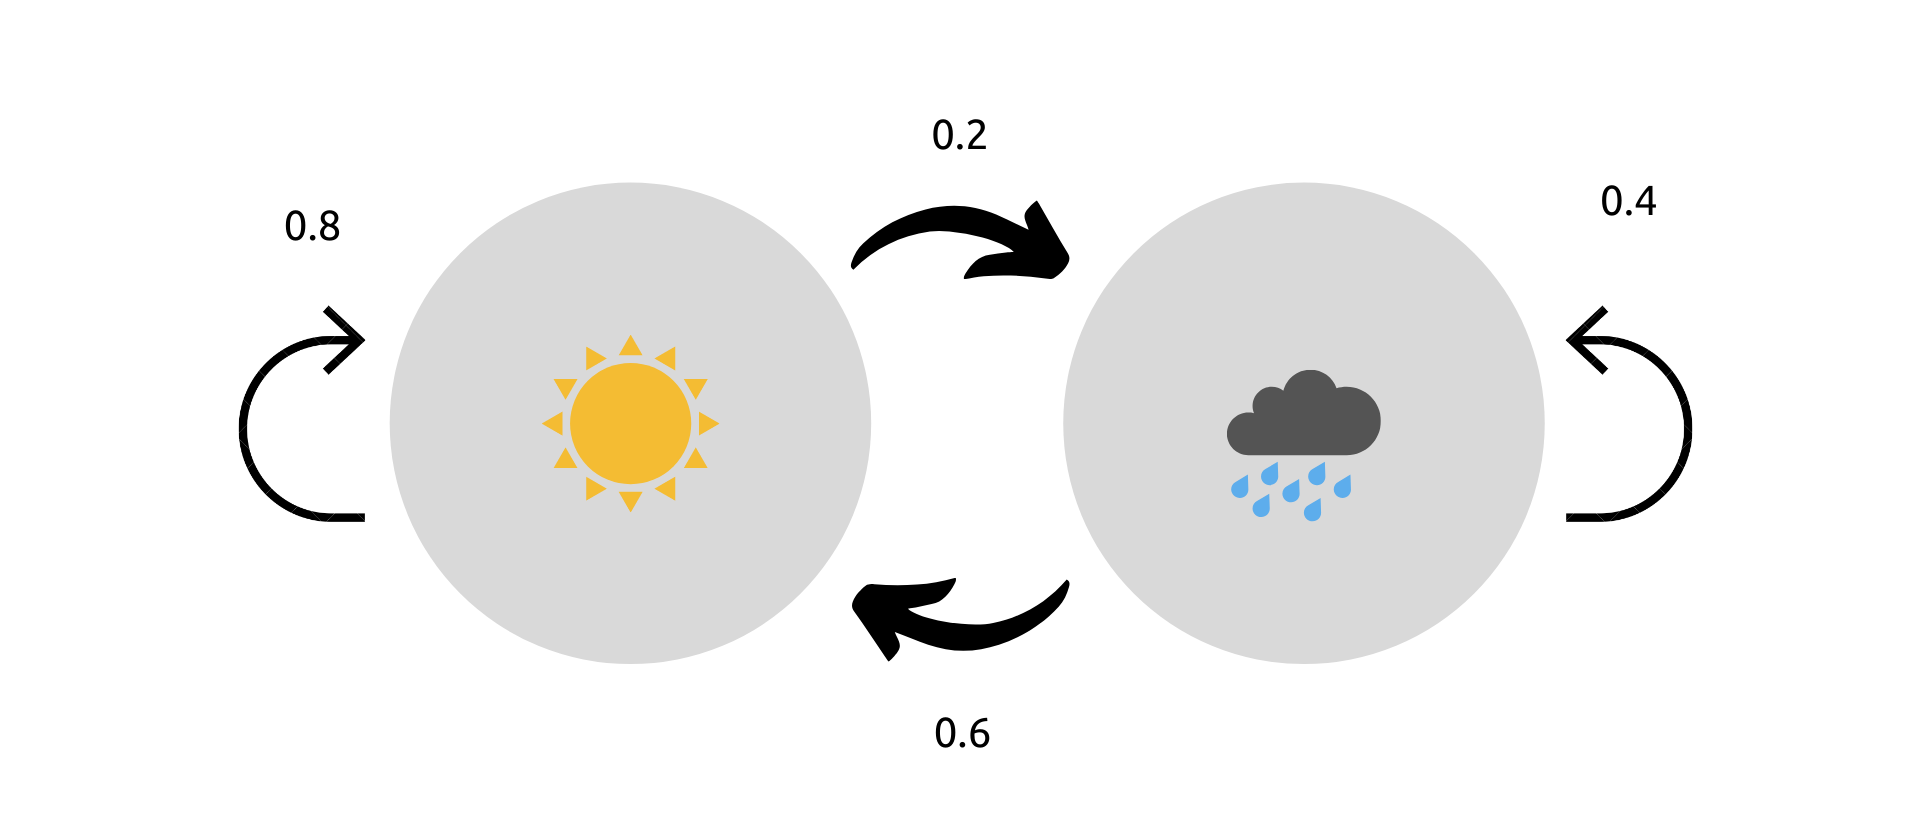

En este tipo de entornos nosotros somos un ente pasivo, de momento no podemos realizar *acciones* (como el ratón en el laberinto), no podemos influenciar el tiempo en nuestra ciudad. Para ir acercándonos al punto donde sí podemos tomar decisiones vamos a ver un ejemplo de matriz de transición en el que eventualmente sí podríamos intervenir. Aunque la inclusión de acciones completa llegará más adelante, calma. De momento imaginémonos a cualquiera en cuarentena estos días y observemos en qué estados se puede encontrar. Nuestra matriz de transición es la siguiente:

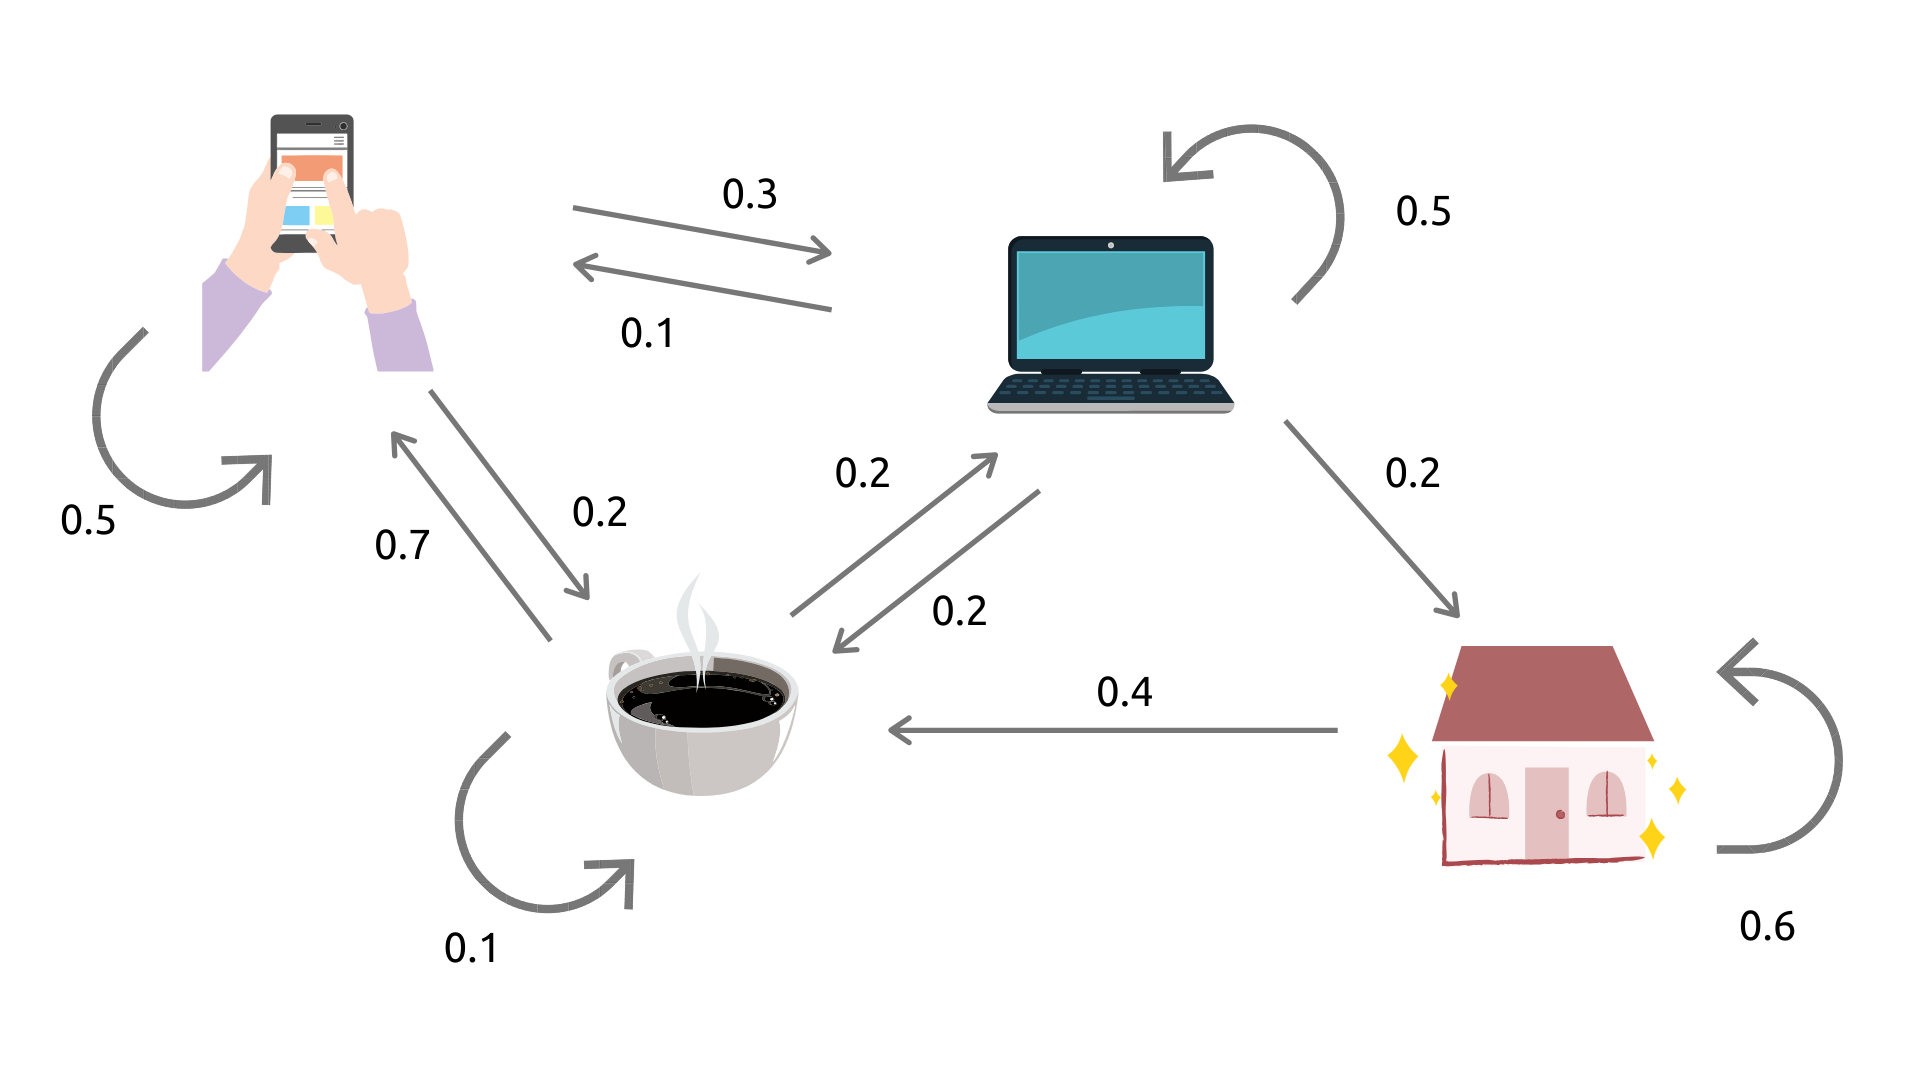

Vemos que nuestra matriz de confusión es algo más compleja, sin embargo es improtante tener en cuenta que normalmente en la práctica no conocemos las probabilidades de transición, es decir, debemos inferir de las observaciones con qué probabilidad nos pondremos a chatear después de tomarnos un café. La cadena de eventos que suceden en un día se conoce como **episodio**. Es importante saber que sea cual sea la probabilidad de transición (ir de un estado al siguiente) ésta no debe cambiar con el tiempo para que sea aplicable el principio de Markov.



### Procesos de Recompensa de Markov: introduciendo recompensas

Para introducir **recompensas** (el queso del ratón) en nuestro modelo es imprescindible primero asignar **valor** a las distintas transiciones dentro de nuestro proceso. Por ejemplo, podemos entender que si estamos con el ordenador y nos ponemos a chatear es algo negativo, ya que nos estamos distrayendo, mientras que si del ordenador pasamos de nuevo al ordenador tendrá un valor positivo ya que el trabajo duro es positivo. Por tanto, lo que podemos hacer a continuación es "contabilizar" cuál es la recompensa total acumulada al final del día (== al final del episodio).

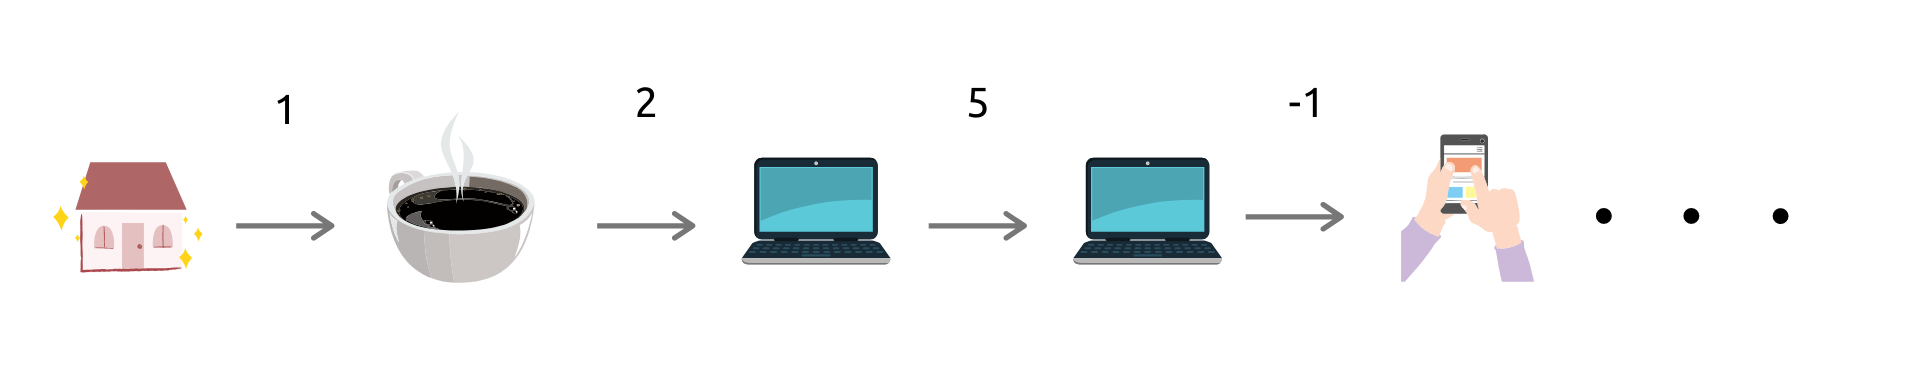

Lo que hacemos entonces para saber qué estado es el mejor de todos es **estimar las recompensas a futuro** de cada uno de ellos. A las recompensas (representadas en el siguiente esquema con manzanas) que esperamos obtener a largo plazo se les aplica un factor de descuento ***gamma $\gamma$*** que "reduce" las expectativas de recompensa que recibiremos a largo plazo, es un factor muy importante. De momento en necesario entenderlo como "cuánto de lejos miramos en el futuro para estimar la recompensa final" o "gamma" $\gamma$ sirve para dar más valor a las recompensas inmediatas frente a las futuras"y es algo que hacemos a diario, por ejemplo, para mí el estado *"me quedo en casa y veo Netflix"* tiene un valor inmediato muy alto porque me gusta y me distraigo, sin embargo opto por *"quedarme en casa y ver una charla sobre Aprendizaje Reforzado"* porque sé que a largo plazo saber sobre RL me traerá consecuencias más positivas (aplicarlo en mi app, sacar mejores notas...). Profundizaremos un poco más adelante sobre este concepto.

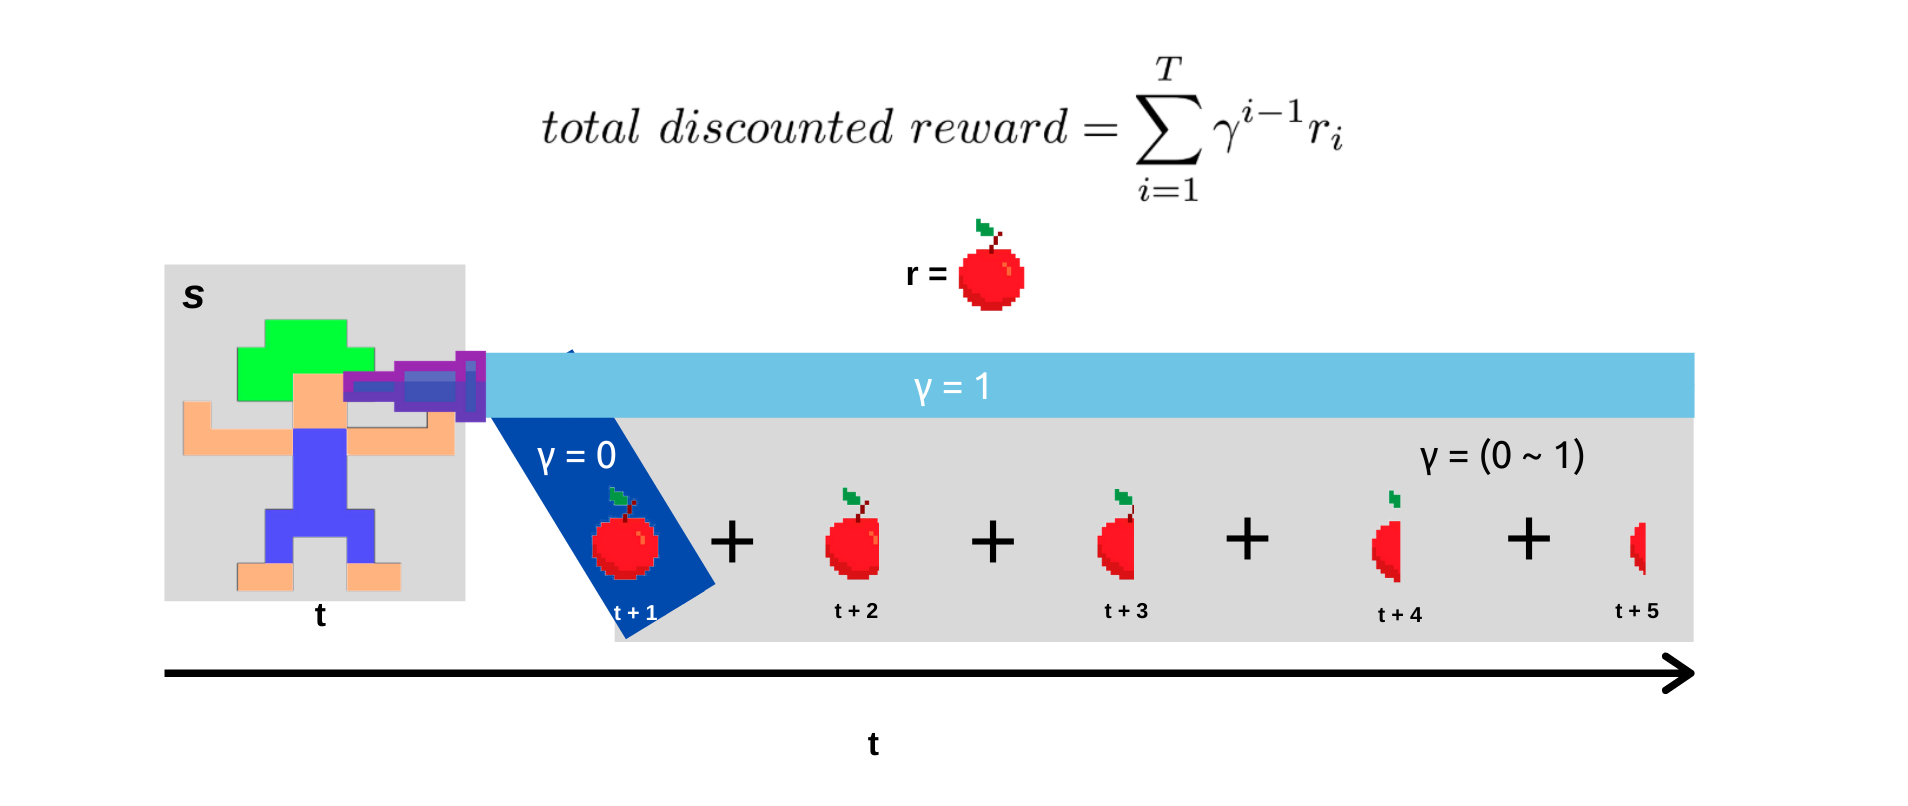

Gracias a esto introducimos otro concepto muy importante que es el **valor de estado** (no confundir con el valor de transición). A cada **estado** *s* se le asigna un **valor** $V_{s}$ que se corresponde con la recompensa esperada a largo plazo. Veamos un ejemplo de cómo calcular el valor de cada estado, usando $\gamma$ y las recompensas de cada transición: 

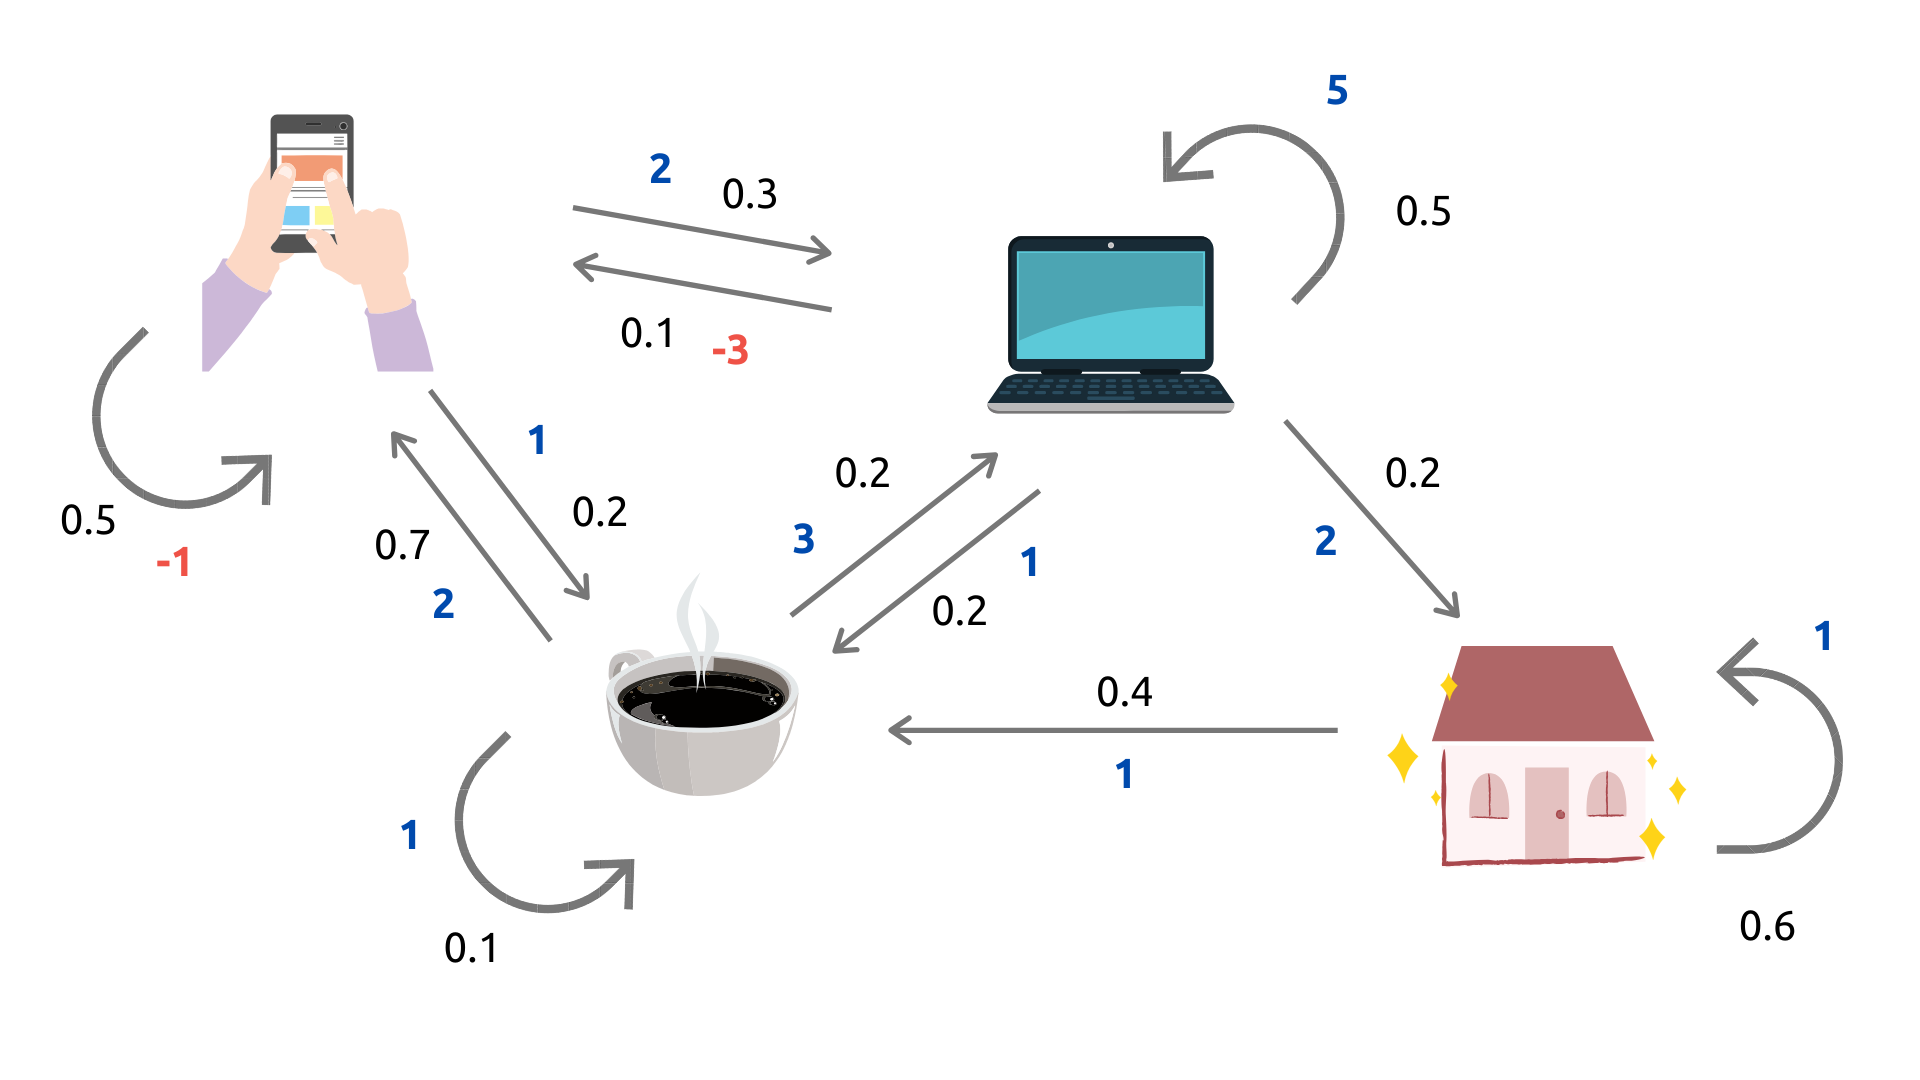

Para simplificar todo un poco imaginemos un **valor de $\gamma$ == 0**, es decir, que sólo nos interesa la recompensa inmediata a nuestra acción. Por tanto, si queremos calcular el valor de cada uno de nuestros 4 estados tenemos, lo siguiente:

*V(chatear) = -1 * 0.5 + 2 * 0.3 + 1 * 0.2 = 0.3*\
*V(café) = 2 * 0.7 + 1 * 0.1 + 3 * 0.2 = 2.1*\
*V(casa) = 1 * 0.6 + 1 * 0.4 = 1.0*\
*V(ordenador) = 5 * 0.5 + (-3) * 0.1 + 1 * 0.2 + 2 * 0.2 = 2.8*

Podemos ver que, **con $\gamma$ == 0** el valor de estado corresponde a una forma ponderada de las recompensas recibidas en el siguiente estado. Estar ante el ordenador es el estado con mayor valor. 

Sin embargo, ¿Qué ocurre cuando **$\gamma$ == 1**? --> Eventualmente nuestro proceso de Markov no tiene fin, y con él las recompensas a futuro. Es por ello que, en este caso, la **estimación de las recompensas a futuro tiende a infinito**, debido a que no hay ningún **estado final** (un estado que haga finalizar el episodio), un ejemplo de estado final podría ser "ir a la cama". 

Es precisamente aquí donde el factor de **gamma** gana valor. No nos interesa tratar con valores a infinito, por eso no sumamos las recompensas "y ya", sino que le aplicamos un factor de descuento que limita nuestro horizonte de visión. Y esta limitación se aplica cuando gamma toma cualquier valor \[0,1). ¿Puede darse el caso en el que nos interese un valor de $\gamma$ == 1?: sí, para entornos finitos, por ejemplo, el tres en raya, nos interesa mantener un valor de $\gamma$ == 1 (al ser un entorno finito el valor de cada estado es también finito). 

Aquí nos encontramos con una de las primeras limitaciones y es que calcular la recompensa cuando tenemos un eventual infinito número de transiciones se convierte en una tarea casi imposible de calcular a mano. Hay métodos mucho más sencillos para calcular los valores de los procesos de recompensas de Markov como la **ecuación de Bellman**. Vamos a ver finalmente como introducir **acciones** dentro de las cadenas de Markov.

### Procesos de Decisión de Markov: introduciendo acciones

En cada estado, nuestro agente cuenta con un set finito de acciones que puede realizar, a este set lo llamamos **"action space"** o espacio de acciones -> *A*. A partir de aquí no observamos pasivamente transiciones, sino que podemos activamente elegir una acción, y esta *acción afecta a las probabilidades de acabar en un estado en el instante siguiente*.

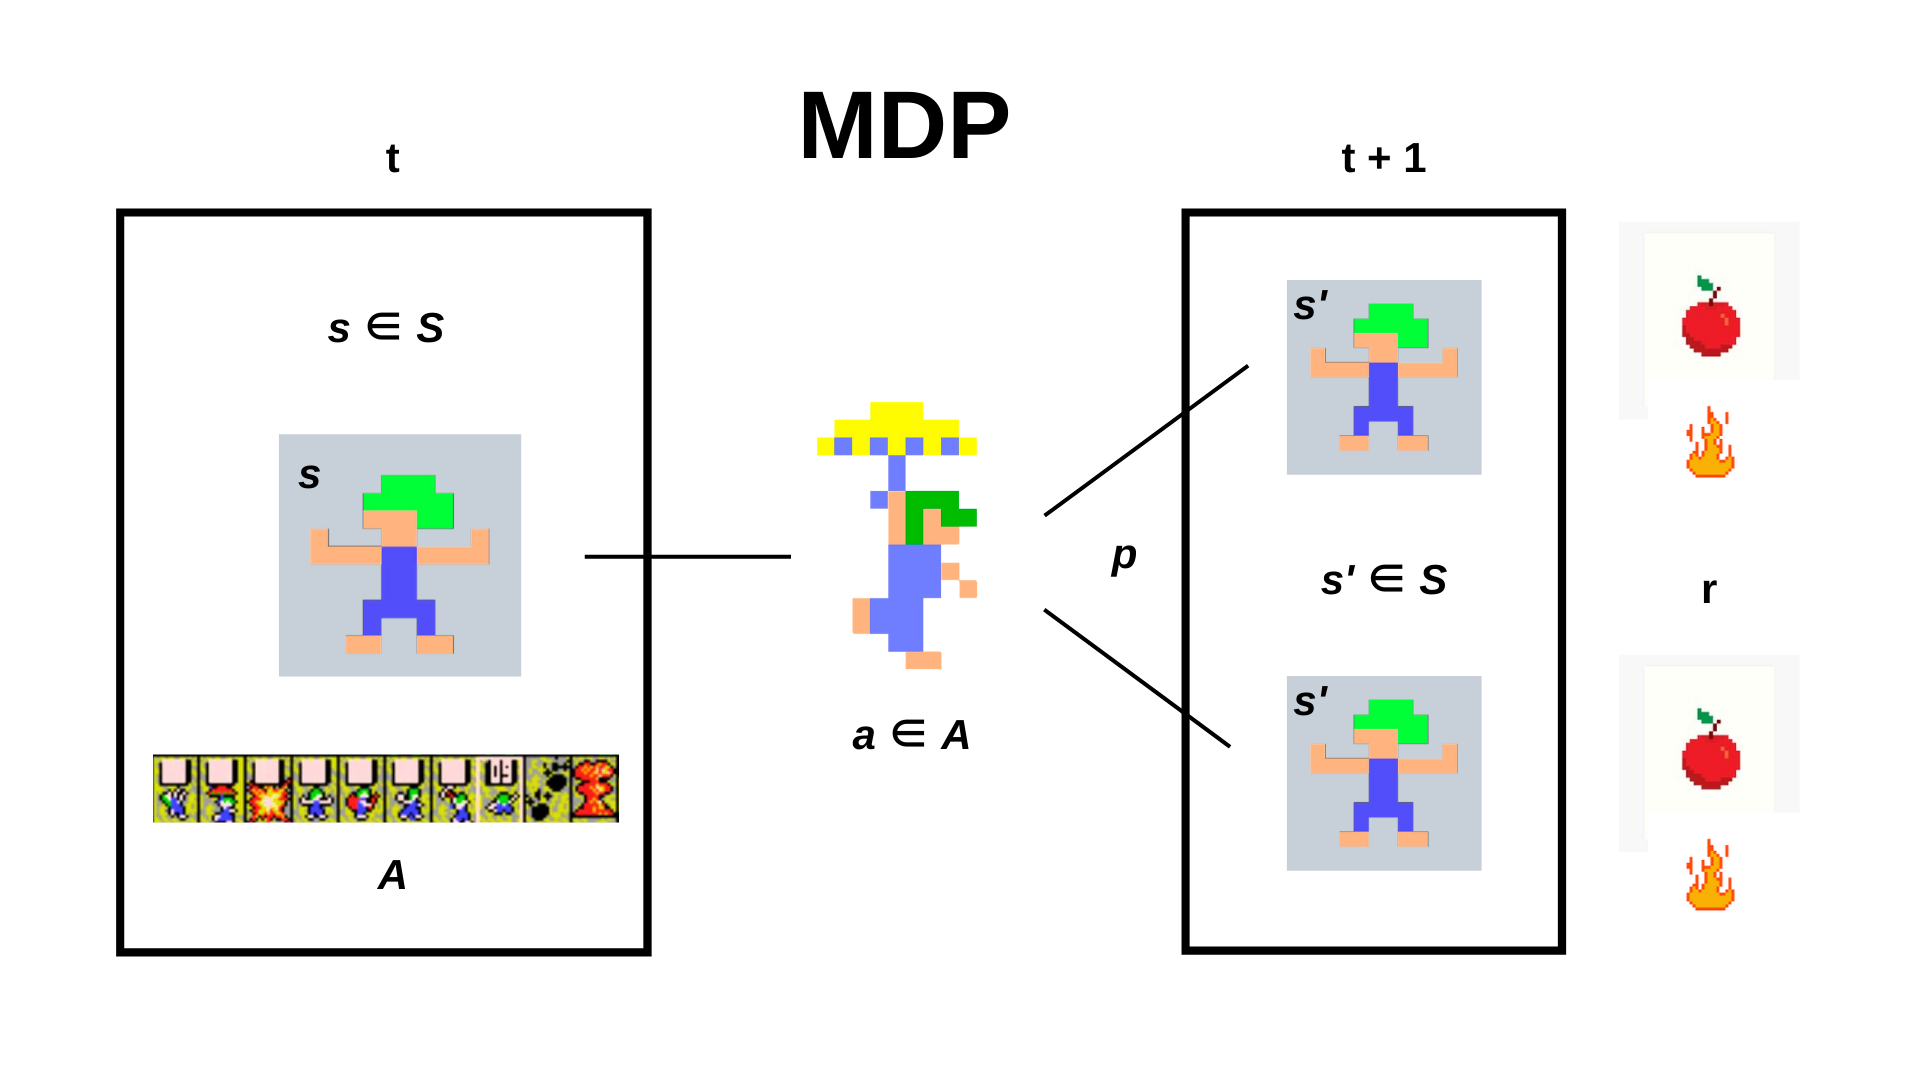

El **esquema del MDP** es el siguiente: nuestro agente, en un estado *s* y en un momento *t* elige una acción *a* perteneciente al espacio de acciones *A*, tras esa acción el agente termina en un estado *s'* en el momento *t+1* dependiendo de una probabilidad *p*, y obtiene una recompensa *r*.

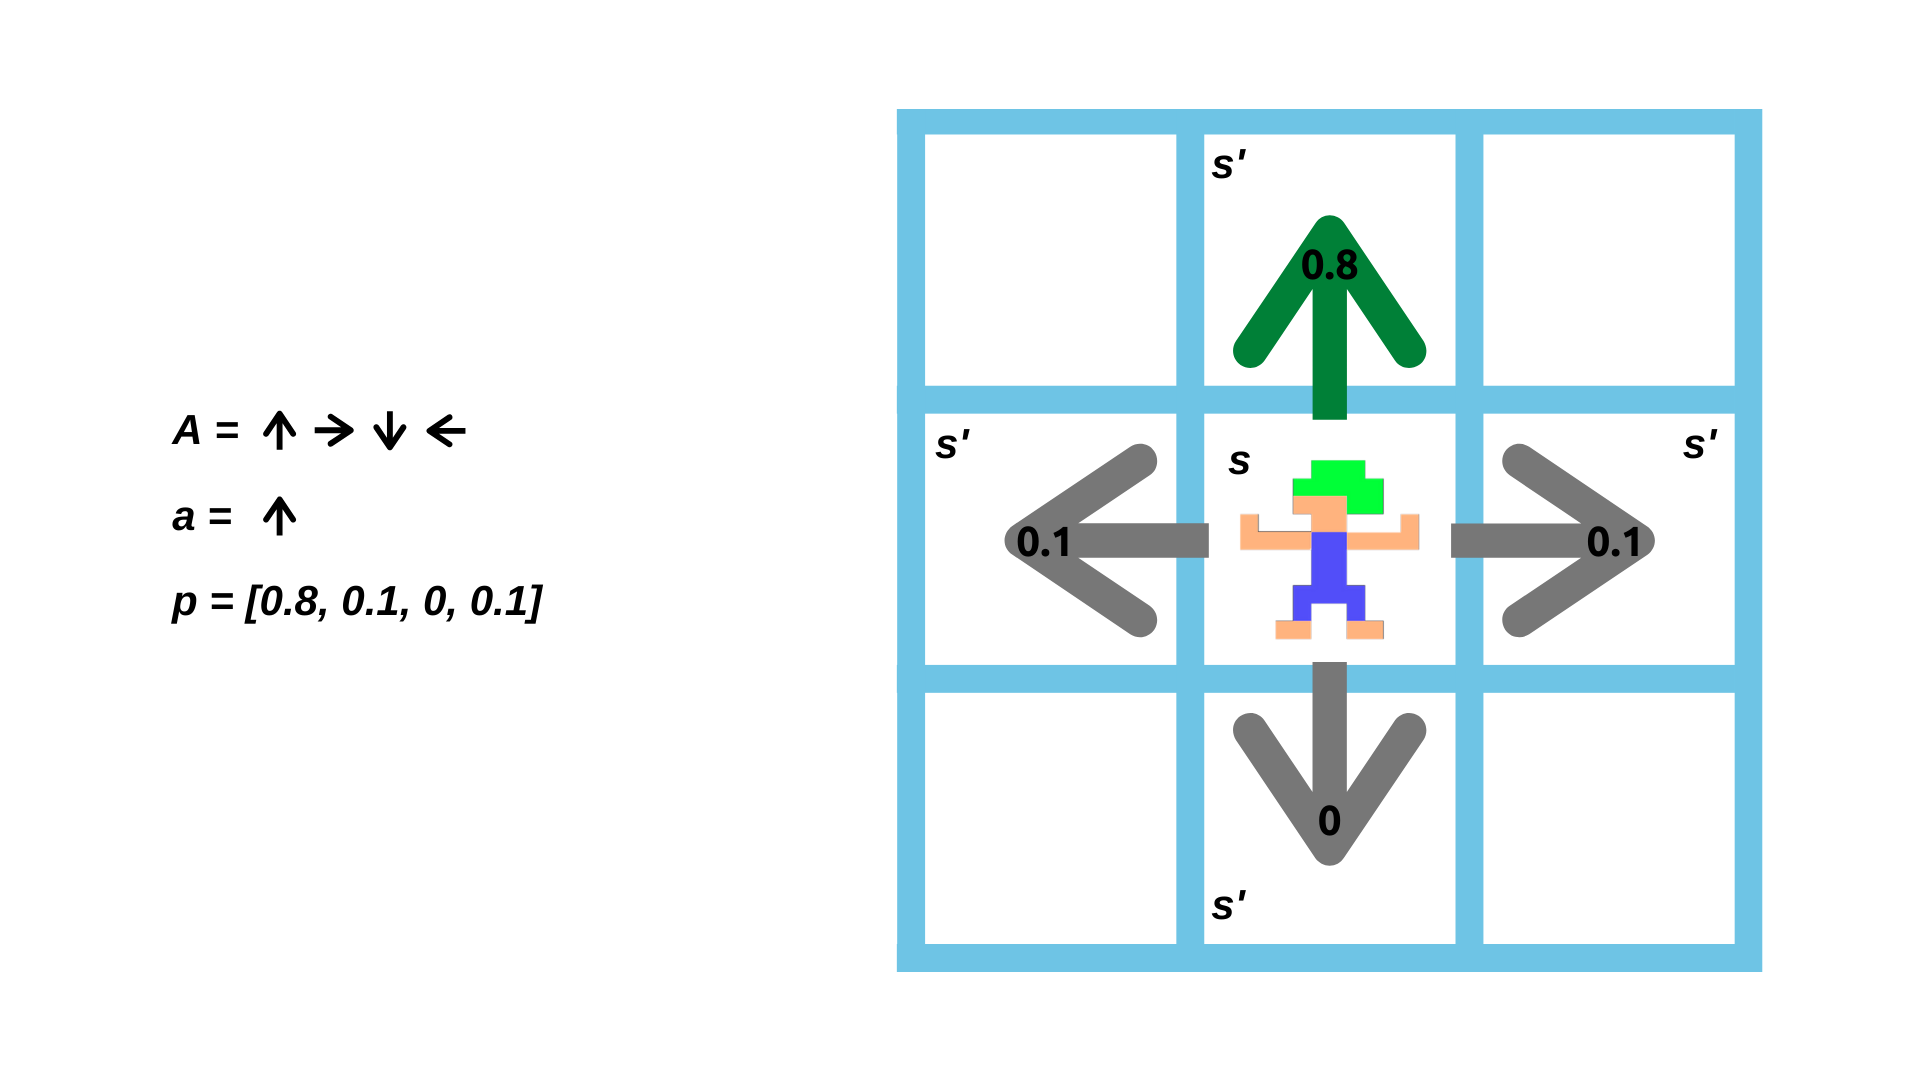

Ahora la diferencia principal es que la recompensa de nuestro agente no depende sólo del estado alcanzado *s'*, sino que **incoporamos la acción que ha realizado *'a'***. Gracias a esto introducimos uno de los conceptos más importantes dentro del campo del RL: **la Política**, que viene a determinar ¿Dado un estado s cuál es la mejor acción a realizar para maximizar la recompensa a largo plazo? Veremos más adelante cómo alcanzar una **política óptima**, que es aquella que **maximiza la recompensa esperada a largo plazo**. En la clase siguiente veremos también cómo se asigna un **valor** a cada estado y veremos cómo este se correlaciona y cambia en función de nuestra **política**, pero por el momento vamos con un poco de código.




# Parte Práctica

### Vamos a programar nuestro primer entorno y su agente

En este dummy example, tenemos las dos entidades que definen el aprendizaje por refuerzo:

- **Agente**: Un ente que tiene un rol activo dentro de un entorno. En la práctica es una pieza de código que implementa una **política**. Básicamente esta política debe decidir qué acción es necesaria en cada paso, dada una serie de observaciones.
- **Entorno**: Un modelo del mundo, externo al agente, que se encarga de proveer a éste con observaciones y recompensas.

![RL_schema](https://miro.medium.com/max/1894/1*-0G8EIeG24OYTbt5KZSalQ.png)

In [2]:
import random

# Creamos la clase Entorno
class Environment:
    def __init__(self, steps):
        
        # Dentro del constructor inicializamos el número máximo de pasos
        self.steps_left = steps
        
    def get_observations(self):
        
        # En este caso de juguete las observaciones son inútiles pero necesarias para entender el concepto.
        return [0.0, 0.0, 0.0]
    
    def get_actions(self):
        
        # Las acciones ficticias que el agente puede tomar ("action space"), son dos: 1 ó 0
        return [0, 1]
    
    def is_done(self):
        
        # Determina si el episodio ha terminado cuando no quedan pasos por ejecutar.
        return self.steps_left == 0
    
    def action(self, action):
        
        # Toma una acción del agente y devuelve una recompensa aleatoria [0, 1)
        if self.is_done():
            raise Exception("Game is over")
        self.steps_left -= 1
        return random.random()


In [3]:
# Creamos la clase agente
class Agent:
    def __init__(self):
        
        # Inicializarmos el contador de recompensas
        self.total_reward = 0.0
        
    def step(self, env):
        
        # El agente ejecuta un paso en el entorno: 
        # Observa el entorno
        current_obs = env.get_observations()
        # Recibe el action space
        actions = env.get_actions()
        # Elige aleatoriamente una acción dentro de ese action space
        selected_action = random.choice(actions)
        # Ejecuta la acción elegida y recibe una recompensa por ello
        reward = env.action(selected_action)
        # Suma la recompensa al contador
        self.total_reward += reward

In [5]:
# Aquí es donde se desarrolla el "baile" del RL
# Creamos un entorno con 10 pasos como límite
env = Environment(10)

# Creamos un agente
agent = Agent()

# El agente ejecuta acciones en el entorno hasta agotar su límite
while not env.is_done():
    agent.step(env)
    
# Imprimimos por pantalla la recompensa acumulada del agente
print("Recompensa total de: %.4f" %agent.total_reward)

Recompensa total de: 4.4757


### Veamos un ejemplo más elaborado gracias a la librería gym

In [7]:
# pip install gym dentro de nuestro entorno
import gym

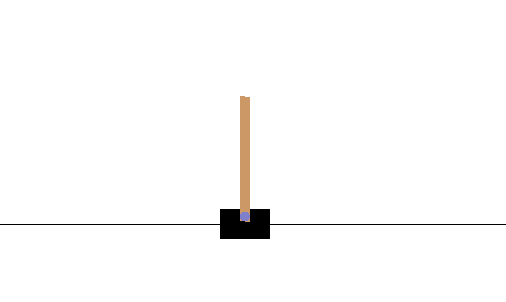

In [6]:
'''
# Creamos el entorno: CartPole consiste en mantener un palo en equilibrio sobre una plataforma
# Esa plataforma la podemos mover a izquierda o derecha para mantener el equilibrio.
# Si el palo se inclina más de 15 grados se da por perdido el juego
# Otro entorno muy conocido es MountainCar-v0
'''

env = gym.make('CartPole-v0')

# Antes de compenzar hay que resetear el entorno
# esta función nos devuelve la primera observación del entorno.
env.reset()

# Ejecutamos 200 pasos en el entorno
for _ in range(200):
    
    # Visualizamos el juego de CartPole
    env.render()
    
    # Tomamos una acción aleatoriamente
    action = env.action_space.sample()
    
    # Ejecutamos la acción y recibimos la nueva observación, la recompensa, si el episodio ha terminado, e info adicional
    observation, reward, done, info = env.step(action) # take a random action

env.close()

D:\ProgramFilesD\Anaconda3\envs\gym\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### Analicemos la librería gym

Todo entorno tiene dos clases de tipo ***Space***, por un lado tenemos el ***action_space*** y por otro el ***observation_space***. El primero nos dice qué acciones están permitidas dentro del entorno, mientras que el segundo especifica las observaciones provistas por el entorno. La clase de tipo Space es heredada por otras clases, en concreto las dos principales que podemos encontrarnos son:

- **Discrete**: Un set de n objetos exclusivos entre sí, por ejemplo, una casilla del tres en raya, enumerados desde 0 hasta n-1. Por ejemplo Discrete(n=4) puede servir para deifinir el action_space de *arriba/abajo/izquierda/derecha*.

- **Box**: Representa un tensor n-dimensional con intervalos [low, high], de carácter continuo, podemos también visualizar su tamaño a través de su parámetro shape.

En el caso del CartPole nuestro espacio de acción es discreto y consta de dos acciones: Izquierda o Derecha, mientras que nuestro espacio de observación es continuo y responde a la posición de la base, velocidad de la base, angulo del poste y ratio de rotación del poste. Aunque realmente las semánticas de las observaciones son irrelevantes ante un buen modelo general de agente.

In [31]:
print(env.action_space)

Discrete(2)


In [35]:
print(env.observation_space)

Box(4,)
